# DAV 5400 Module 9 Project 2
### by Sreyash Mudiam Venkata

# XML Parsing

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from xml_parser import WebPageScraper

# URL of the NASA 3D models contributors page
page_url = "https://nasa3d.arc.nasa.gov/credits"

# Instantiate the web page scraper
scraper = WebPageScraper(page_url)

# Fetch page content
page_content = scraper.fetch_page_content()

# Scrape contributors data
contributors_data = scraper.scrape_page(page_content)

# Create a DataFrame from the contributors data
df_contributors = pd.DataFrame(contributors_data)

# Display the DataFrame
print(df_contributors)

                                         Contributors  ContributorCounts
0               {'Contributor': 'Chris Meaney. NASA'}                 74
1   {'Contributor': 'NASA Jet Propulsion Laborator...                 34
2        {'Contributor': 'NASA Ames Research Center'}                 32
3   {'Contributor': 'Michael Carbajal. NASA Headqu...                 26
4   {'Contributor': 'Dr. Carol Christian, HST Outr...                 22
..                                                ...                ...
71  {'Contributor': 'Robert Hillan, Future Enginee...                  1
72  {'Contributor': 'Michael C. Nolan/Arecibo Obse...                  1
73        {'Contributor': 'Alex Arredondo/NASA IV&V'}                  1
74                  {'Contributor': 'D. Heihn, SwRI'}                  1
75  {'Contributor': 'Michael Zemba, NASA/GRC, Adva...                  1

[76 rows x 2 columns]


# Using an API

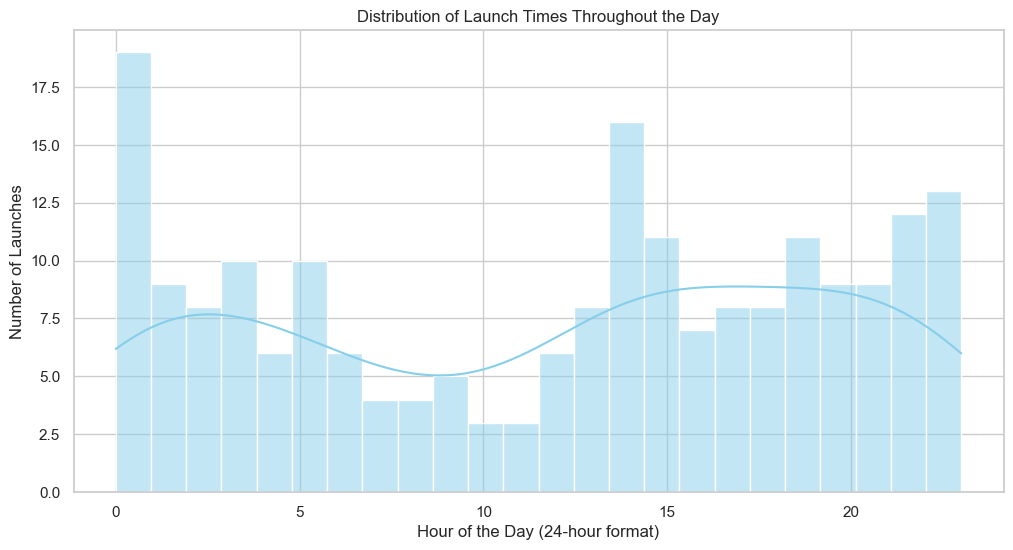

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from api_data_collector import APIDataCollector

# Set Seaborn style
sns.set(style="whitegrid")

# API URL for SpaceX launches
api_url = "https://api.spacexdata.com/v4/launches"

# Instantiate the data collector
data_collector = APIDataCollector(api_url)

# Make the API request
data = data_collector.make_request()

if data:
    # Process the API response
    df = data_collector.process_response(data)

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extracting the hour of the day from the 'Date' column
    df['LaunchHour'] = df['Date'].dt.hour

    # Plotting the distribution of launch times
    plt.figure(figsize=(12, 6))
    sns.histplot(df['LaunchHour'], bins=24, kde=True, color='skyblue')
    plt.title('Distribution of Launch Times Throughout the Day')
    plt.xlabel('Hour of the Day (24-hour format)')
    plt.ylabel('Number of Launches')
    plt.show()

- Initializing the class
- Providing path of the data file

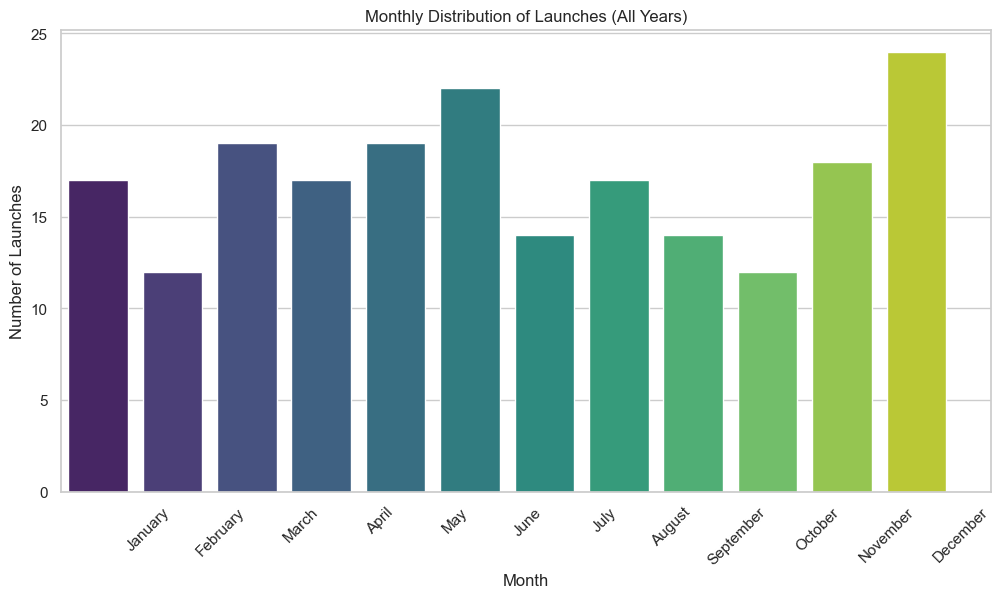

In [2]:
from calendar import month_name

# Extract month from 'Date'
df['Month'] = df['Date'].dt.month

# Count launches per month
monthly_distribution = df['Month'].value_counts().sort_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the monthly distribution with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_distribution.index, y=monthly_distribution.values, palette="viridis")

# Customize x-axis ticks with month names
month_names = [month_name[i] for i in monthly_distribution.index]
plt.xticks(monthly_distribution.index, labels=month_names, rotation=45, ha='right')

plt.title('Monthly Distribution of Launches (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.show()

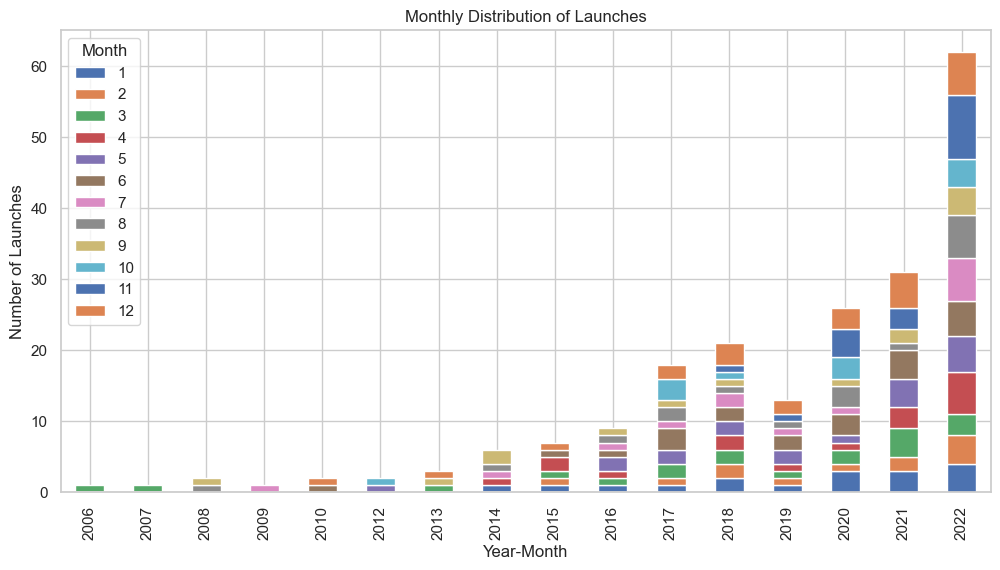

In [3]:
df['Year'] = df['Date'].dt.year

# Group by month and count launches
monthly_distribution = df.groupby(['Year', 'Month']).size().unstack().fillna(0)

# Plot the monthly distribution
monthly_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Distribution of Launches')
plt.xlabel('Year-Month')
plt.ylabel('Number of Launches')
plt.show()

# Web Scraping

In [6]:
from web_scraper import WebScraper

base_url = "https://quotes.toscrape.com/"
scraper = WebScraper(base_url)
all_quotes = scraper.scrape_all_pages()

if all_quotes:
    df_quotes = pd.DataFrame(all_quotes)
    print(df_quotes)

                                                Quote
0   “The world as we have created it is a process ...
1   “It is our choices, Harry, that show what we t...
2   “There are only two ways to live your life. On...
3   “The person, be it gentleman or lady, who has ...
4   “Imperfection is beauty, madness is genius and...
..                                                ...
95  “You never really understand a person until yo...
96  “You have to write the book that wants to be w...
97  “Never tell the truth to people who are not wo...
98        “A person's a person, no matter how small.”
99  “... a mind needs books as a sword needs a whe...

[100 rows x 1 columns]


# References
- Chapter 7 in "Hands-On Data Analysis with Pandas" by Stefanie Molin
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html